<a href="https://colab.research.google.com/github/holykov0816/public/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22Portfolio_Optimisation%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

from pandas_datareader import data as web #Functions from pandas_datareader.data and pandas_datareader.wb extract data from various Internet sources into a pandas DataFrame.
import pandas as pd
import yfinance as yf
import numpy as np
from datetime import datetime # Python Datetime module supplies classes to work with date and time.
import matplotlib.pyplot as plt # for graphs
plt.style.use("fivethirtyeight")

yf.pdr_override()

     |████████████████████████████████| 63 kB 1.9 MB/s 
     |████████████████████████████████| 6.4 MB 60.7 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
assets = ["MSFT", "FB", 'LICY', "AAPL", 'EA', 'LCID', "NFLX", "GOOG", 'SPY']

In [ ]:
# Assign weights to the stocks
weights = np.array([0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.60])

In [ ]:
#Get the Portfolio starting date
stockStartDate = "2019-01-01"

In [ ]:
#Get the stocks ending date (today)
today = datetime.today().strftime("%Y-%m-%d")
today

'2022-01-09'

In [ ]:
#Create a dataframe to store the adjusted close price of the stocks
df = pd.DataFrame()

#Store the adjusted close price of the stock into the df
for stock in assets:
  df[stock] = web.DataReader(stock, data_source = 'yahoo', start = stockStartDate, end = today)["Adj Close"]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
df

,MSFT,FB,LICY,AAPL,EA,LCID,NFLX,GOOG,SPY
Date,,,,,,,,,
2019-01-02,97.782425,135.679993,NaN,38.326290,79.865685,NaN,267.660004,1045.849976,237.858841
2019-01-03,94.185204,131.740005,NaN,34.508713,78.216087,NaN,271.200012,1016.059998,232.182892
2019-01-04,98.565689,137.949997,NaN,35.981865,83.890259,NaN,297.570007,1070.709961,239.960037
2019-01-07,98.691391,138.050003,NaN,35.901764,87.040352,NaN,315.339996,1068.390015,241.852051
2019-01-08,99.406982,142.529999,NaN,36.586170,88.461388,NaN,320.269989,1076.280029,244.124298
...,...,...,...,...,...,...,...,...,...
2022-01-03,334.750000,338.540009,10.07,182.009995,134.949997,40.930000,597.369995,2901.489990,477.709991
2022-01-04,329.010010,336.529999,9.99,179.699997,135.759995,39.410000,591.150024,2888.330078,477.549988
2022-01-05,316.380005,324.170013,9.12,174.919998,133.800003,36.680000,567.520020,2753.070068,468.380005


In [ ]:
weights

array([0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.6 ])

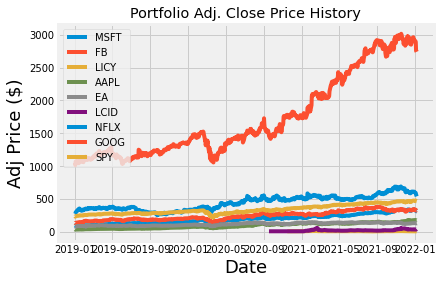

In [ ]:
#Visually show the stock / portfolio
title = 'Portfolio Adj. Close Price History'

#Get the stocks
my_stocks = df

#Create and plot the graph
for c in my_stocks.columns.values:   # function of dataframe
  plt.plot(my_stocks[c], label = c)


plt.title(title)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Adj Price ($)', fontsize = 18)
plt.legend(my_stocks.columns.values, loc = "upper left")
plt.show()

In [ ]:
#Show the daily simple return
returns = df.pct_change()
returns

,MSFT,FB,LICY,AAPL,EA,LCID,NFLX,GOOG,SPY
Date,,,,,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,-0.036788,-0.029039,NaN,-0.099607,-0.020655,NaN,0.013226,-0.028484,-0.023863
2019-01-04,0.046509,0.047138,NaN,0.042689,0.072545,NaN,0.097234,0.053786,0.033496
2019-01-07,0.001275,0.000725,NaN,-0.002226,0.037550,NaN,0.059717,-0.002167,0.007885
2019-01-08,0.007251,0.032452,NaN,0.019063,0.016326,NaN,0.015634,0.007385,0.009395
...,...,...,...,...,...,...,...,...,...
2022-01-03,-0.004668,0.006511,0.011044,0.025004,0.023124,0.075690,-0.008416,0.002730,0.005790
2022-01-04,-0.017147,-0.005937,-0.007944,-0.012692,0.006002,-0.037137,-0.010412,-0.004536,-0.000335
2022-01-05,-0.038388,-0.036728,-0.087087,-0.026600,-0.014437,-0.069272,-0.039973,-0.046830,-0.019202


In [ ]:
# Create and show the annualized covariance matrix
cov_matrix_annual = returns.cov() * 252
cov_matrix_annual  # Diagonal line = the variance = volatility

,MSFT,FB,LICY,AAPL,EA,LCID,NFLX,GOOG,SPY
MSFT,0.092159,0.071660,0.029302,0.080037,0.047212,0.019979,0.062556,0.069955,0.055902
FB,0.071660,0.124757,0.035726,0.078577,0.046942,0.038991,0.066996,0.073118,0.051710
LICY,0.029302,0.035726,0.259335,0.022931,0.006596,0.183964,0.033985,0.029713,0.021220
AAPL,0.080037,0.078577,0.022931,0.116287,0.050640,0.029476,0.062858,0.067426,0.058464
EA,0.047212,0.046942,0.006596,0.050640,0.110640,0.012932,0.055890,0.038528,0.031570
LCID,0.019979,0.038991,0.183964,0.029476,0.012932,1.146879,0.021309,0.024095,0.018816
NFLX,0.062556,0.066996,0.033985,0.062858,0.055890,0.021309,0.145482,0.055635,0.038037
GOOG,0.069955,0.073118,0.029713,0.067426,0.038528,0.024095,0.055635,0.087326,0.050069
SPY,0.055902,0.051710,0.021220,0.058464,0.031570,0.018816,0.038037,0.050069,0.047881


In [ ]:
# Calculate the portfolio variance
port_variance = np.dot( weights.T, np.dot(cov_matrix_annual, weights))
port_variance

0.04907686945026635

In [ ]:
#Calculate the portfolio volatility aka standard deviation
port_volatility = np.sqrt(port_variance)
port_volatility

0.22153299855837807

In [ ]:
#Calculate the annual portfolio return
portfolioSimpleAnnualReturn = np.sum(returns.mean() * weights) * 252
portfolioSimpleAnnualReturn


0.3466002920544739

In [ ]:
#Show the expected annual return, volatility (risk), and variance

percent_var = str(round(port_variance, 2) * 100) + '%'
percent_vols = str(round(port_volatility, 2) *100) + '%'
percent_ret = str(round(portfolioSimpleAnnualReturn, 2) * 100) + '%'

print('Expected annual return: '+ percent_ret)
print('Annual volatility/risk: '+ percent_vols)
print('Annual variance' + percent_var)

Expected annual return: 35.0%
Annual volatility/risk: 22.0%
Annual variance5.0%


In [ ]:
pip install PyPortfolioOpt

     |████████████████████████████████| 61 kB 6.7 MB/s 
     |████████████████████████████████| 2.7 MB 38.8 MB/s 
  Attempting uninstall: cvxpy
    Found existing installation: cvxpy 1.0.31
    Uninstalling cvxpy-1.0.31:
      Successfully uninstalled cvxpy-1.0.31


In [ ]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [ ]:
# Portfolio Optimisation

#Calculate the returns and the annualized sample covariance matrix of asset returns

mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

#optimize for max sharpe ratio
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose = True)

OrderedDict([('MSFT', 0.08864), ('FB', 0.0), ('LICY', 0.0), ('AAPL', 0.67174), ('EA', 0.0), ('LCID', 0.23962), ('NFLX', 0.0), ('GOOG', 0.0), ('SPY', 0.0)])
Expected annual return: 96.0%
Annual volatility: 37.3%
Sharpe Ratio: 2.52


(0.9603302703660411, 0.3727159324876273, 2.5229140704825017)

In [ ]:
#Get the discrete allocation of each share per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value = 3000000)

allocation , leftover = da.lp_portfolio()
print('Discrete allocation:', allocation)
print('Funds remaining: ${:.2f}'.format(leftover))

Discrete allocation: {'MSFT': 847, 'AAPL': 11705, 'LCID': 17121}
Funds remaining: $18.71
